In [1]:
import numpy as np
import matplotlib.pyplot as plt

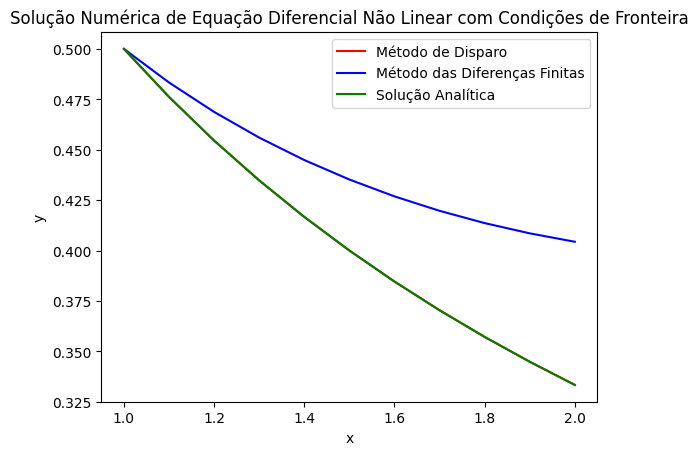

Relativo erro (método de disparo): 1.895873076418475e-06
Relativo erro (método de diferenças finitas): 0.14202020492014378


In [2]:
def RK4(f, x0, y0, h, X):
    m = len(X)
    Y = np.zeros((m,2))
    Y[0,:] = [y0[0], y0[1]]
    for i in range(m-1):
        xi = x0 + i*h
        yi = Y[i,:]
        k1 = h*f(xi, yi)
        k2 = h*f(xi + h/2, yi + k1/2)
        k3 = h*f(xi + h/2, yi + k2/2)
        k4 = h*f(xi + h, yi + k3)
        Y[i+1,:] = Y[i,:] + (k1 + 2*k2 + 2*k3 + k4)/6
    return Y

def f(x, y):
    return np.array([y[1], y[0]**3 - y[0]*y[1]])

def shooting_method(f, x0, y0, h, X, target):
    m = len(X)
    for i in range(1000):
        Y = RK4(f, x0, y0, h, X)
        if abs(Y[m-1,0] - target[0]) < 1e-6:
            break
        y0[1] += (target[0] - Y[m-1,0])/10
    return Y

def finite_difference_method(f, x0, y0, h, X, target):
    m = len(X)
    Y = np.zeros((m,2))
    Y[0,:] = [y0[0], (target[0] - y0[0])/(X[m-1] - X[0])]
    for i in range(1, m):
        xi = x0 + (i-1)*h
        yi = Y[i-1,:]
        Y[i,:] = [yi[0] + h*yi[1], yi[1] + h*(yi[0]**3 - yi[0]*yi[1])]
    return Y

def analytical_solution(x):
    return (x + 1)**(-1)

X = np.arange(1, 2.1, 0.1)
Y_shoot = shooting_method(f, 1, [1/2, 0], 0.1, X, [1/3, 0])
Y_fd = finite_difference_method(f, 1, [1/2, 0], 0.1, X, [1/3, 0])
Y_an = analytical_solution(X)

plt.plot(X, Y_shoot[:,0], 'r', label='Método de Disparo')
plt.plot(X, Y_fd[:,0], 'b', label='Método das Diferenças Finitas')
plt.plot(X, Y_an, 'g', label='Solução Analítica')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solução Numérica de Equação Diferencial Não Linear com Condições de Fronteira')
plt.show()

error_shoot = np.abs(Y_shoot[:,0] - Y_an)
error_fd = np.abs(Y_fd[:,0] - Y_an)

print('Relativo erro (método de disparo):', np.max(error_shoot)/np.max(Y_an))
print('Relativo erro (método de diferenças finitas):', np.max(error_fd)/np.max(Y_an))